In [1]:
#Importar el Archivo de paros de Planta a Google Colab
from google.colab import files
uploaded = files.upload()


Saving Informe_paros.xlsx to Informe_paros.xlsx


In [2]:
import pandas as pd

# Cargar el archivo a dataframe de pandas y verificar su contenido
df = pd.read_excel('/content/Informe_paros.xlsx')  # o .xlsx
df.head()


,No. 1s,Fecha,INICIO,FINAL,TIEMPO DE PARO,CAUSA (DIGITAR EN MAYUSCULAS),PROCESO,HORAS TOTAL (H),Codigo ubicación tecnica,Tipo Paro,...,MES,FECHA PROGRAMADO,RESPONSABLE RCA,ID,OBSERVACION ESTADO DEL ANALISIS,AÑO,Frecuencia Evento,Severidad,Clasificación,Efectividad Acciones (Repetitividad paro)
0,0,2022-01-01,00:00:00,05:15:00,05:15:00,PARADA PROGRAMADA DE PRODUCCION,CRUDO,5.250000,EC01-361,PROGRAMA DE PRODUCCION,...,enero,NaN,NaN,NaN,NaN,2022,NaN,NaN,NaN,NaN
1,1,2022-01-01,02:58:00,04:58:00,02:00:00,TOLVAS LLENAS,CARBON,2.000000,EC01-L61,EXTERNO,...,enero,NaN,NaN,NaN,NaN,2022,NaN,NaN,NaN,NaN
2,0,2022-01-01,00:00:00,23:59:00,23:59:00,SILOS LLENOS,CEMENTO,23.983333,EC01-561,EXTERNO,...,enero,NaN,NaN,NaN,NaN,2022,NaN,NaN,NaN,NaN
3,0,2022-01-01,00:00:00,07:00:00,07:00:00,PARADA PROGRAMADA DE PRODUCCION,TRITURADORA,7.000000,IA01-211,PROGRAMA DE PRODUCCION,...,enero,NaN,NaN,NaN,NaN,2022,NaN,NaN,NaN,NaN
4,0,2022-01-01,07:00:00,23:00:00,16:00:00,SIN ACTIVIDAD DE ZEMER,TRITURADORA,16.000000,IA01-211,EXTERNO,...,enero,NaN,NaN,NaN,NaN,2022,NaN,NaN,NaN,NaN


In [3]:
# Listar, filas y columnas
df.shape

(2767, 34)

In [4]:
# Describir tabla, número de entradas, columnas, tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   No. 1s                                     2758 non-null   object        
 1   Fecha                                      2767 non-null   datetime64[ns]
 2   INICIO                                     2754 non-null   object        
 3   FINAL                                      2752 non-null   object        
 4   TIEMPO DE PARO                             2742 non-null   object        
 5   CAUSA (DIGITAR EN MAYUSCULAS)              2759 non-null   object        
 6   PROCESO                                    2767 non-null   object        
 7   HORAS TOTAL (H)                            2741 non-null   float64       
 8   Codigo ubicación tecnica                   2757 non-null   object        
 9   Tipo Paro          

In [5]:
#Verificar valores nulos
df.isnull().sum()


,0
No. 1s,9
Fecha,0
INICIO,13
FINAL,15
TIEMPO DE PARO,25
CAUSA (DIGITAR EN MAYUSCULAS),8
PROCESO,0
HORAS TOTAL (H),26
Codigo ubicación tecnica,10
Tipo Paro,0


In [6]:
# Crear una copia del Dataframe
df_limpio = df.copy()

In [7]:
#Por regla heurística, se define eliminar las columnas que presentan más del 70% de valores nulos.

limite = 0.8  # 80%
df_limpio = df.loc[:, df.isnull().mean() < limite]


In [8]:
#listado de Columnas primera limpieza
df_limpio.isnull().sum()

,0
No. 1s,9
Fecha,0
INICIO,13
FINAL,15
TIEMPO DE PARO,25
CAUSA (DIGITAR EN MAYUSCULAS),8
PROCESO,0
HORAS TOTAL (H),26
Codigo ubicación tecnica,10
Tipo Paro,0


In [9]:
# Listar, filas y columnas
df_limpio.shape

(2767, 18)

In [10]:
# Elimino solo los registros nulos en la columna inicio
df_limpio = df_limpio.dropna(subset=['INICIO'])

In [11]:
# Elimino solo los registros nulos en la columna inicio
df_limpio = df_limpio.dropna(subset=['FINAL'])

In [12]:
# Listar, filas y columnas
df_limpio.shape

(2752, 18)

In [13]:
# Visualizar registros para definir acciones de limpieaza, sea eliminacion o reemplazo
df_limpio['AREA2'].head(5)


,AREA2
0,CRUDO
1,CARBON
2,CEMENTO
3,TRITURADORA
4,TRITURADORA


In [ ]:
# Remplazo registros nulos por Palabra No registra en columna area
df_limpio['AREA2'] = \
df_limpio['AREA2'].fillna('No registra')


<ipython-input-25-d9081f15ce8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['AREA2'] = \


In [ ]:
# Visualizar registros para definir acciones de limpieaza, sea eliminacion o reemplazo
df_limpio['NOMBRE RCA'].head(5)


,NOMBRE RCA
0,PARADA PROGRAMADA DE PRODUCCION
1,TOLVAS LLENAS
2,INVENTARIOS ALTOS
3,PARADA PROGRAMADA DE PRODUCCION
4,SIN ACTIVIDAD DE ZEMER
5,TOLVAS LLENAS
6,PARADA PROGRAMADA DE PRODUCCION
7,PROGRAMADO PARA MONTAJE DE SCRAPERS
8,CAMBIOS DE GIRO SEGUIDOS DE LA ROTARY 361VR01
9,"TOLVA L61TY01 VACIA, POR CAMA DE RECLAMADOR N..."


In [ ]:
# Remplazo registros nulos por Palabra sin rca en columna
df_limpio['NOMBRE RCA'] = \
df_limpio['NOMBRE RCA'].fillna('Sin RCA')


<ipython-input-29-6178fedfb685>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['NOMBRE RCA'] = \


In [ ]:
# Visualizar registros para definir acciones de limpieaza, sea eliminacion o reemplazo
df_limpio['CLASE'].head(5)


,CLASE
0,PP PROCESO
1,EXTERNO
2,EXTERNO
3,PP PROCESO
4,EXTERNO
5,EXTERNO
6,PP PROCESO
7,PP
8,EXTERNO
9,PROCESO


In [ ]:
# Remplazo registros nulos por Palabra sin clase en columna
df_limpio['CLASE'] = \
df_limpio['CLASE'].fillna('Sin Clase')


<ipython-input-32-28d62e88da87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['CLASE'] = \


In [ ]:
# Fecuencia de los datos e las columnas
frecuencias = df_limpio['PROCESO2'].value_counts()
print(frecuencias)

PROCESO2
PROCESO                                                             858
MANTENIMIENTO                                                       344
EXTERNO                                                              28
2024                                                                  3
PRODUCCION                                                            2
FLUTUACION DE ENERGIA POR LLUVIA, FALLA DE PFISTER DEL QUEMADOR       1
2025                                                                  1
Name: count, dtype: int64


In [ ]:
# Remplazo registros nulos por Palabra No Especificado en columna
df_limpio['PROCESO2'] = \
df_limpio['PROCESO2'].fillna('No Especificado')


<ipython-input-37-1dbe304fad93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['PROCESO2'] = \


In [ ]:
# Fecuencia de los datos e las columnas
frecuencias = df_limpio['AREA'].value_counts()
print(frecuencias)

AREA
PROCESO           859
MTTO MECANICO     276
MTTO ELECTRICO    148
MANTENIMIENTO     140
PRODUCCION         69
MECANICO           58
EXTERNO            28
ELECTRICO          22
CEMENTO             3
AMBIENTAL           2
SEGURIDAD           1
CALIDAD             1
Name: count, dtype: int64


In [ ]:
# Remplazo registros nulos por Palabra Sin area en columna
df_limpio['AREA'] = \
df_limpio['AREA'].fillna('Sin Area')

<ipython-input-41-3c0cb613a3ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['AREA'] = \


In [ ]:
# Fecuencia de los datos e las columnas
frecuencias = df_limpio['Imputación'].value_counts()
print(frecuencias)

Imputación
MOLINO VERTICAL                       176
VALVULA ROTATIVA                      145
ALTO INVENTARIO                       136
HORNO                                 108
BANDA TRANSPORTADORA                   84
BANDA DOSIFICADORA                     33
FILTRO                                 27
FALTA DE SUMINISTRO DE ABASTOS         26
DOSIFICADOR                            26
TOLVA                                  22
ELEVADOR DE CANGILONES                 21
ALIMENTADOR DE MATERIAL                20
RECLAMADOR                             20
TRITURADORA                            15
MOTOR                                  12
SISTEMA DE LUBRICACION                 12
MOLINO                                 11
SISTEMA HIDRAULICO                     11
APILADOR                               10
DETECTOR DE METALES                     9
PROGRAMADO DE PRODUCCIÓN                8
CORTE SUMINISTRO ENERGIA ELECTRICA      8
VENTILADOR                              7
ENFRIADOR              

In [ ]:
# Remplazo registros nulos por Palabra No Especificado en columna
df_limpio['Imputación'] = \
df_limpio['Imputación'].fillna('Sin Imputacion')

<ipython-input-44-d54bfee57e80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Imputación'] = \


In [ ]:
# Remplazo registros nulos por Palabra EC01 columna
df_limpio['Codigo ubicación tecnica'] = \
df_limpio['Codigo ubicación tecnica'].fillna('EC01')

<ipython-input-46-5c164e43250f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Codigo ubicación tecnica'] = \


In [ ]:
# Fecuencia de los datos e las columnas
frecuencias = df_limpio['CAUSA (DIGITAR EN MAYUSCULAS)'].value_counts()
print(frecuencias)

CAUSA (DIGITAR EN MAYUSCULAS)
PARADA PROGRAMADA DE PRODUCCION                                               471
TOLVAS LLENAS                                                                  76
TOLVAS LLENAS                                                                  73
PARO PROGRAMADO DE HORNO                                                       71
MANTENIMIENTO PROGRAMADO                                                       58
                                                                             ... 
ATASQUE CAJA LAMINAS 491TC01                                                    1
ALTA TEMPERATURA EN CHUMACERA DEL HORNO                                         1
ATASQUE EN ELEVADOR DE RECIRCULACIÓN, CON CANGILÓN                              1
SIN ACTIVIDAD DE ZEMER                                                          1
SE PARA MOLINO POR DEZALINIAMIENTO DE BANDA 361BT01 POR CAUSA DE UNA RAIZ       1
Name: count, Length: 1090, dtype: int64


In [ ]:
# Remplazo registros nulos por Palabra OTRA CAUSA columna
df_limpio['CAUSA (DIGITAR EN MAYUSCULAS)'] = \
df_limpio['CAUSA (DIGITAR EN MAYUSCULAS)'].fillna('OTRA CAUSA')

<ipython-input-48-357d338ad53b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['CAUSA (DIGITAR EN MAYUSCULAS)'] = \


In [ ]:
# Fecuencia de los datos e las columnas
frecuencias = df_limpio['TIEMPO DE PARO'].value_counts()
print(frecuencias)

TIEMPO DE PARO
23:59:00    122
07:00:00     89
00:05:00     36
00:04:00     31
00:14:00     31
           ... 
05:57:00      1
07:29:00      1
20:01:00      1
18:15:00      1
12:23:00      1
Name: count, Length: 629, dtype: int64


In [ ]:
# Reemplazar nulos por 0 en una columna
df_limpio['TIEMPO DE PARO'] = df_limpio['TIEMPO DE PARO'].fillna(1)

<ipython-input-52-60cae4fb29d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['TIEMPO DE PARO'] = df_limpio['TIEMPO DE PARO'].fillna(1)


In [ ]:
# Fecuencia de los datos e las columnas
frecuencias = df_limpio['HORAS TOTAL (H)'].value_counts()
print(frecuencias)

HORAS TOTAL (H)
23.983333    122
7.000000      89
0.066667      22
0.816667      18
1.250000      17
            ... 
13.166667      1
21.600000      1
7.233333       1
23.650000      1
3.480000       1
Name: count, Length: 1233, dtype: int64


In [ ]:
# Reemplazar nulos por 0 en una columna
df_limpio['HORAS TOTAL (H)'] = df_limpio['HORAS TOTAL (H)'].fillna(1)

<ipython-input-53-2c24e080ac3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['HORAS TOTAL (H)'] = df_limpio['HORAS TOTAL (H)'].fillna(1)


In [ ]:
#listado Final de Columnas primera limpieza
df_limpio.isnull().sum()

,0
No. 1s,0
Fecha,0
INICIO,0
FINAL,0
TIEMPO DE PARO,0
CAUSA (DIGITAR EN MAYUSCULAS),0
PROCESO,0
HORAS TOTAL (H),0
Codigo ubicación tecnica,0
Tipo Paro,0


In [ ]:
# Crear archivo CSV con  primera limpieza sin datos nulos
df_limpio.to_csv('df_limpio1.csv', index=False)

from google.colab import files
files.download('df_limpio1.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Ver los tipos de datos de mis columnas
df_limpio.dtypes

,0
no_1s,object
fecha,datetime64[ns]
inicio,datetime64[ns]
final,datetime64[ns]
tiempo_de_paro,datetime64[ns]
causa_(digitar_en_mayusculas),object
proceso,object
horas_total_(h),float64
codigo_ubicación_tecnica,object
tipo_paro,object


In [ ]:
# Ver el tipo real de dato que contiene la columna fecha
df_limpio['Fecha'].map(type).value_counts()

,count
Fecha,
<class 'pandas._libs.tslibs.timestamps.Timestamp'>,2752


In [ ]:
# Ver el tipo real de dato que contiene la columna fecha
df_limpio['HORAS TOTAL (H)'].map(type).value_counts()

,count
HORAS TOTAL (H),
<class 'float'>,2752


In [ ]:
#Ver el tipo de dato real de las columnas tipo Object
for col in df_limpio.select_dtypes(include='object').columns:
    print(f"Columna: {col}")
    print(df_limpio[col].map(type).value_counts())
    print("-" * 40)


Columna: no_1s
no_1s
<class 'str'>    2745
Name: count, dtype: int64
----------------------------------------
Columna: causa_(digitar_en_mayusculas)
causa_(digitar_en_mayusculas)
<class 'str'>    2745
Name: count, dtype: int64
----------------------------------------
Columna: proceso
proceso
<class 'str'>    2745
Name: count, dtype: int64
----------------------------------------
Columna: codigo_ubicación_tecnica
codigo_ubicación_tecnica
<class 'str'>    2745
Name: count, dtype: int64
----------------------------------------
Columna: tipo_paro
tipo_paro
<class 'str'>    2745
Name: count, dtype: int64
----------------------------------------
Columna: imputación
imputación
<class 'str'>    2745
Name: count, dtype: int64
----------------------------------------
Columna: area
area
<class 'str'>    2745
Name: count, dtype: int64
----------------------------------------
Columna: proceso2
proceso2
<class 'str'>      2741
<class 'float'>       4
Name: count, dtype: int64
-----------------------

In [ ]:
# Fecuencia de los datos en las columna se evidencia que es de tipo string pero contiene tambien datos enteros
frecuencias = df_limpio['No. 1s'].value_counts()
print(frecuencias)

No. 1s
1       1415
PARO     774
0        459
CONT     104
Name: count, dtype: int64


In [ ]:
# Estandarizar datos a string para homologar el tipo de datos sin perder significado
df_limpio['No. 1s'] = df_limpio['No. 1s'].replace(1, 'PARO')

In [ ]:
# Estandarizar datos a string para homologar el tipo de datos sin perder significado
df_limpio['No. 1s'] = df_limpio['No. 1s'].replace(0, 'CONT')

In [ ]:
# Convertir fecha de Inicio a un tipo adecuado para spark
df_limpio['INICIO'] = pd.to_timedelta(df_limpio['INICIO'].astype(str))
df_limpio['FECHA_INICIO'] = df_limpio['Fecha'] + df_limpio['INICIO']
df_limpio['FECHA_INICIO'].dtypes
df_limpio['FECHA_INICIO'].head()

In [ ]:
# Reeemplazar columna original por la del tipo adecuado
df_limpio['INICIO'] = df_limpio['FECHA_INICIO']
df_limpio = df_limpio.drop(columns=['FECHA_INICIO'])

In [ ]:
# Convertir fecha de Inicio a un tipo adecuado para spark
df_limpio['FINAL'] = pd.to_timedelta(df_limpio['FINAL'].astype(str))
df_limpio['FECHA_FINAL'] = df_limpio['Fecha'] + df_limpio['FINAL']
df_limpio['FECHA_FINAL'].dtypes
df_limpio['FECHA_FINAL'].head()

,FECHA_FINAL
0,2022-01-01 05:15:00
1,2022-01-01 04:58:00
2,2022-01-01 23:59:00
3,2022-01-01 07:00:00
4,2022-01-01 23:00:00


In [ ]:
# Reeemplazar columna original por la del tipo adecuado
df_limpio['FINAL'] = df_limpio['FECHA_FINAL']
df_limpio = df_limpio.drop(columns=['FECHA_FINAL'])

In [ ]:
# Convertir fecha de Inicio a un tipo adecuado para spark
df_limpio['TIEMPO DE PARO'] = pd.to_timedelta(df_limpio['TIEMPO DE PARO'].astype(str))
df_limpio['FECHA_TIEMPO DE PARO'] = df_limpio['Fecha'] + df_limpio['TIEMPO DE PARO']
df_limpio['FECHA_TIEMPO DE PARO'].dtypes
df_limpio['FECHA_TIEMPO DE PARO'].head()

,FECHA_TIEMPO DE PARO
0,2022-01-01 05:15:00
1,2022-01-01 02:00:00
2,2022-01-01 23:59:00
3,2022-01-01 07:00:00
4,2022-01-01 16:00:00


In [ ]:
# Reeemplazar columna original por la del tipo adecuado
df_limpio['TIEMPO DE PARO'] = df_limpio['FECHA_TIEMPO DE PARO']
df_limpio = df_limpio.drop(columns=['FECHA_TIEMPO DE PARO'])

In [ ]:
df_limpio.head(5)

,no_1s,fecha,inicio,final,tiempo_de_paro,causa_(digitar_en_mayusculas),proceso,horas_total_(h),codigo_ubicación_tecnica,tipo_paro,imputación,area,proceso2,clase,nombre_rca,area2,mes,año
0,CONT,2022-01-01,2022-01-01 00:00:00,2022-01-01 05:15:00,2022-01-01 05:15:00,PARADA PROGRAMADA DE PRODUCCION,CRUDO,5.250000,EC01-361,PROGRAMA DE PRODUCCION,ALTO INVENTARIO,PROCESO,PROCESO,PP PROCESO,PARADA PROGRAMADA DE PRODUCCION,CRUDO,enero,2022
1,PARO,2022-01-01,2022-01-01 02:58:00,2022-01-01 04:58:00,2022-01-01 02:00:00,TOLVAS LLENAS,CARBON,2.000000,EC01-L61,EXTERNO,ALTO INVENTARIO,PROCESO,PROCESO,EXTERNO,TOLVAS LLENAS,CARBON,enero,2022
2,CONT,2022-01-01,2022-01-01 00:00:00,2022-01-01 23:59:00,2022-01-01 23:59:00,SILOS LLENOS,CEMENTO,23.983333,EC01-561,EXTERNO,ALTO INVENTARIO,PROCESO,PROCESO,EXTERNO,INVENTARIOS ALTOS,CEMENTO,enero,2022
3,CONT,2022-01-01,2022-01-01 00:00:00,2022-01-01 07:00:00,2022-01-01 07:00:00,PARADA PROGRAMADA DE PRODUCCION,TRITURADORA,7.000000,IA01-211,PROGRAMA DE PRODUCCION,Sin Imputacion,PROCESO,PROCESO,PP PROCESO,PARADA PROGRAMADA DE PRODUCCION,TRITURADORA,enero,2022
4,CONT,2022-01-01,2022-01-01 07:00:00,2022-01-01 23:00:00,2022-01-01 16:00:00,SIN ACTIVIDAD DE ZEMER,TRITURADORA,16.000000,IA01-211,EXTERNO,Sin Imputacion,PROCESO,PROCESO,EXTERNO,SIN ACTIVIDAD DE ZEMER,TRITURADORA,enero,2022


In [ ]:
#df_limpio = df_limpio.iloc[:, :-1]
#se creo por herror columna al final se elimina

In [ ]:
# Convertir las columnas tipo Object a string para lectura correcta en sparl
df['No. 1s'] = df['No. 1s'].astype(str)

In [ ]:
# Convertir las columnas tipo Object a string para lectura correcta en sparl
df['CAUSA (DIGITAR EN MAYUSCULAS)'] = df['CAUSA (DIGITAR EN MAYUSCULAS)'].astype(str)


In [ ]:
# Convertir las columnas tipo Object a string para lectura correcta en spark y limitar
df['PROCESO'] = df['PROCESO'].astype(str)

In [ ]:
## Convertir las columnas tipo Object a float para lectura correcta en sparl
df['HORAS TOTAL (H)'] = df['HORAS TOTAL (H)'].astype(float)

In [ ]:
# Convertir las columnas tipo Object a string para lectura correcta en sparl
df['Codigo ubicación tecnica'] = df['Codigo ubicación tecnica'].astype(str)


In [ ]:
# Convertir las columnas tipo Object a string para lectura correcta en sparl
df['Tipo Paro'] = df['Tipo Paro'].astype(str)

In [ ]:
# Convertir las columnas tipo Object a string para lectura correcta en sparl
df['Imputación'] = df['Imputación'].astype(str)

In [ ]:
# Convertir las columnas tipo Object a string para lectura correcta en sparl
df['AREA'] = df['AREA'].astype(str)

In [ ]:
# Convertir las columnas tipo Object a string para lectura correcta en sparl
df['PROCESO2'] = df['PROCESO2'].astype(str)

In [ ]:
# Convertir las columnas tipo Object a string para lectura correcta en sparl
df['CLASE'] = df['CLASE'].astype(str)

In [ ]:
# Convertir las columnas tipo Object a string para lectura correcta en sparl
df['NOMBRE RCA'] = df['NOMBRE RCA'].astype(str)

In [ ]:
# Convertir las columnas tipo Object a string para lectura correcta en sparl
df['AREA2'] = df['AREA2'].astype(str)

In [ ]:
# Convertir las columnas tipo Object a string para lectura correcta en sparl
df['MES'] = df['MES'].astype(str)

In [ ]:
# Convertir las columnas tipo Object a string para lectura correcta en sparl
df['AÑO'] = df['AÑO'].astype(int)

In [ ]:
# Eliminacion de caracteres especiales en los datos de todo el data frame
df_limpio.columns = df_limpio.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '', regex=False)

In [ ]:
# Limpieza y estandarizacion de columnas categoricas
cols_categoricas = ['tipo_paro', 'proceso', 'causa_(digitar_en_mayusculas)', 'area', 'proceso2', 'nombre_rca', 'area2']
for col in cols_categoricas:
    df_limpio[col] = df_limpio[col].str.strip().str.upper()


In [ ]:
# verificar que no existan valores de texto en columnas numericas
df_limpio['horas_total_(h)'] = pd.to_numeric(df_limpio['horas_total_(h)'], errors='coerce')
df_limpio['AÑO'] = pd.to_numeric(df_limpio['horas_total_(h)'], errors='coerce')

In [ ]:
#Eliminar filas duplicadas
df_limpio = df_limpio.drop_duplicates()

In [ ]:
# Reduce la longitud de las cadenas de texto a maximo 100 caracteres
df_limpio['causa_(digitar_en_mayusculas)'] = df_limpio['causa_(digitar_en_mayusculas)'].str.slice(0, 100)

In [ ]:
# Listar, filas y columnas
df_limpio.shape

(2745, 19)

In [ ]:
# Crear archivo CSV con segunda limpieza convercion de datos y estandarizacion
df_limpio.to_csv('df_limpio2.csv', index=False)

from google.colab import files
files.download('df_limpio2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Convertir mi data frame en pandas a un dataframe en Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
#Mostrar 5 registros del Data frame
df_spark = spark.createDataFrame(df_limpio)
df_spark.printSchema()
df_spark.show(5)


root
 |-- no_1s: string (nullable = true)
 |-- fecha: timestamp (nullable = true)
 |-- inicio: timestamp (nullable = true)
 |-- final: timestamp (nullable = true)
 |-- tiempo_de_paro: timestamp (nullable = true)
 |-- causa_(digitar_en_mayusculas): string (nullable = true)
 |-- proceso: string (nullable = true)
 |-- horas_total_(h): double (nullable = true)
 |-- codigo_ubicación_tecnica: string (nullable = true)
 |-- tipo_paro: string (nullable = true)
 |-- imputación: string (nullable = true)
 |-- area: string (nullable = true)
 |-- proceso2: string (nullable = true)
 |-- clase: string (nullable = true)
 |-- nombre_rca: string (nullable = true)
 |-- area2: string (nullable = true)
 |-- mes: string (nullable = true)
 |-- año: long (nullable = true)

+-----+-------------------+-------------------+-------------------+-------------------+-----------------------------+-----------+------------------+------------------------+--------------------+---------------+-------+--------+----------+---

In [ ]:
# Tipos de datos en spark
df_spark.dtypes

[('no_1s', 'string'),
 ('fecha', 'timestamp'),
 ('inicio', 'timestamp'),
 ('final', 'timestamp'),
 ('tiempo_de_paro', 'timestamp'),
 ('causa_(digitar_en_mayusculas)', 'string'),
 ('proceso', 'string'),
 ('horas_total_(h)', 'double'),
 ('codigo_ubicación_tecnica', 'string'),
 ('tipo_paro', 'string'),
 ('imputación', 'string'),
 ('area', 'string'),
 ('proceso2', 'string'),
 ('clase', 'string'),
 ('nombre_rca', 'string'),
 ('area2', 'string'),
 ('mes', 'string'),
 ('año', 'bigint')]

In [ ]:
# Limpieza adicional con spark
df_spark = df_spark.na.drop()  # Elimina filas con nulos
df_spark = df_spark.dropDuplicates() # Elimina duplicados


In [ ]:
# Verificar numero de registros
df_spark.count()


2745

In [ ]:
# Limitar a 2 decimales las columnas flotantes
from pyspark.sql.functions import round

df_spark = df_spark.withColumn("horas_total_(h)", round("horas_total_(h)", 2))


In [ ]:
# Ver resultados
df_spark.show(5)

+-----+-------------------+-------------------+-------------------+-------------------+-----------------------------+-------+---------------+------------------------+---------+----------------+-------+--------+-------+--------------------+-------+-------+----+
|no_1s|              fecha|             inicio|              final|     tiempo_de_paro|causa_(digitar_en_mayusculas)|proceso|horas_total_(h)|codigo_ubicación_tecnica|tipo_paro|      imputación|   area|proceso2|  clase|          nombre_rca|  area2|    mes| año|
+-----+-------------------+-------------------+-------------------+-------------------+-----------------------------+-------+---------------+------------------------+---------+----------------+-------+--------+-------+--------------------+-------+-------+----+
| CONT|2022-01-31 00:00:00|2022-01-31 00:00:00|2022-01-31 03:34:00|2022-01-31 03:34:00|         BOTA LLENA DEL EL...|CEMENTO|           3.57|           EC01-581-EC01|OPERACION|  AERODESLIZADOR|PROCESO| PROCESO|PROCESO

In [ ]:
# Muestra la frecuencia de repeticion de los registros por cada columna
df_spark.groupBy("no_1s") \
        .count() \
        .orderBy("count", ascending=False) \
        .show(n=50, truncate=False)


+-----+-----+
|no_1s|count|
+-----+-----+
|PARO |2183 |
|CONT |562  |
+-----+-----+



In [ ]:
# Muestra la frecuencia de repeticion de los registros por cada columna
df_spark.groupBy("causa_(digitar_en_mayusculas)") \
        .count() \
        .orderBy("count", ascending=False) \
        .show(n=20, truncate=False)


+--------------------------------------------------------+-----+
|causa_(digitar_en_mayusculas)                           |count|
+--------------------------------------------------------+-----+
|PARADA PROGRAMADA DE PRODUCCION                         |466  |
|TOLVAS LLENAS                                           |148  |
|PARO PROGRAMADO DE HORNO                                |71   |
|MANTENIMIENTO PROGRAMADO                                |58   |
|SILO LLENO                                              |45   |
|ALTAS VIBRACIONES                                       |43   |
|ATASQUE ROTARY ALIMENTACION L61VR02 CON MATERIAL HUMEDO |41   |
|PARO DE HORNO                                           |32   |
|SILO DE HARINA LLENO                                    |28   |
|DESALINEAMIENTO BANDA 531BT01                           |22   |
|FALTA DE CLINKER, DOMO VACIO                            |20   |
|ATASQUE ROTATIVA CARBON L61VR02, MATERIAL HUMEDO        |19   |
|ATASQUE DUCTO ALIMENTACI

In [ ]:
# Agrupar en Spark y convertir a Pandas
causas_df = df_spark.groupBy("causa_(digitar_en_mayusculas)") \
                    .count() \
                    .orderBy("count", ascending=False) \
                    .limit(20)  # Limitar a las 20 más frecuentes

causas_pd = causas_df.toPandas()


<ipython-input-222-3d425ad8a099>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


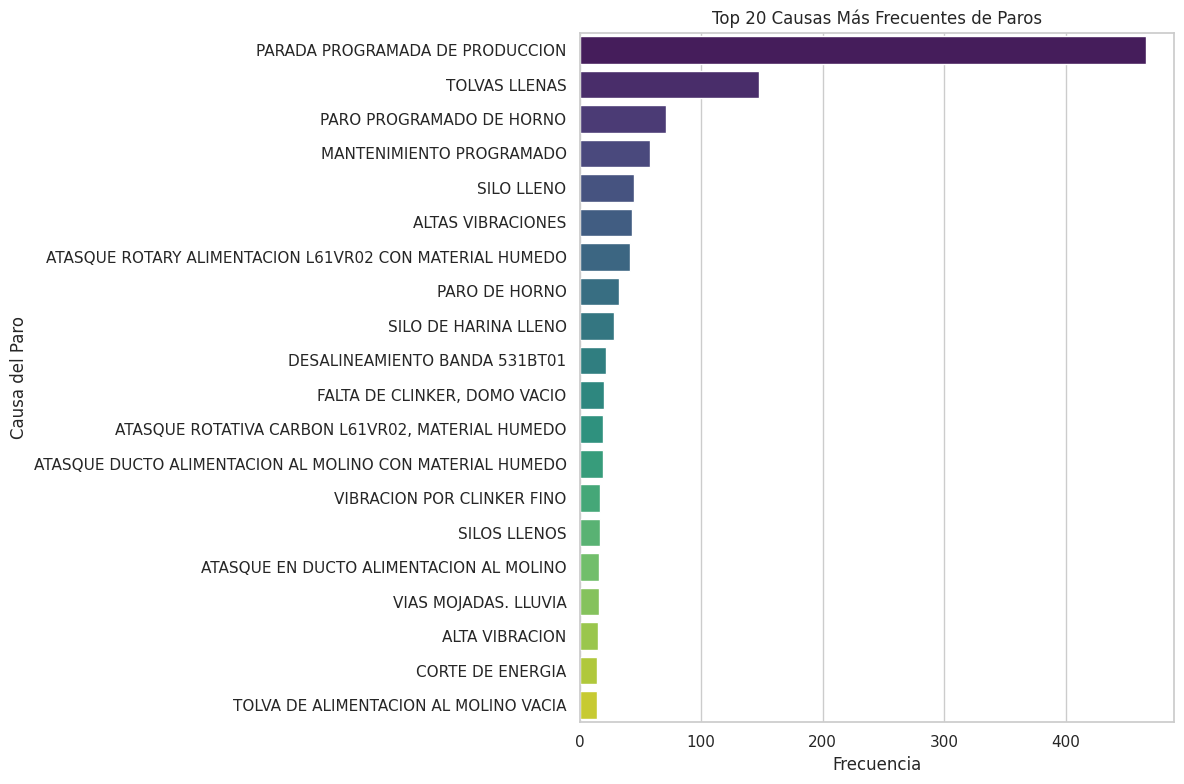

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráfico
sns.set(style="whitegrid")

# Tamaño del gráfico
plt.figure(figsize=(12, 8))

# Gráfico de barras horizontales
sns.barplot(
    data=causas_pd,
    y="causa_(digitar_en_mayusculas)",
    x="count",
    palette="viridis"
)

# Etiquetas y título
plt.title("Top 20 Causas Más Frecuentes de Paros")
plt.xlabel("Frecuencia")
plt.ylabel("Causa del Paro")
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
# Muestra la frecuencia de repeticion de los registros por cada columna
df_spark.groupBy("proceso") \
        .count() \
        .orderBy("count", ascending=False) \
        .show(n=100, truncate=False)

+-------------+-----+
|proceso      |count|
+-------------+-----+
|CARBON       |712  |
|TRITURADORA  |706  |
|CRUDO        |560  |
|CEMENTO      |262  |
|HORNO        |184  |
|CEMENTO UG   |169  |
|CEMENTO ART  |142  |
|CEMENTO FIBRO|9    |
|EMPAQUE      |1    |
+-------------+-----+



In [ ]:
# Muestra la frecuencia de repeticion de los registros por cada columna
df_spark.groupBy("codigo_ubicación_tecnica") \
        .count() \
        .orderBy("count", ascending=False) \
        .show(n=20, truncate=False)

+------------------------+-----+
|codigo_ubicación_tecnica|count|
+------------------------+-----+
|IA01-211                |603  |
|EC01-L61                |426  |
|EC01-561                |274  |
|EC01-361                |247  |
|EC01-L61-VR02           |131  |
|EC01-461                |90   |
|EC01-361-VR01           |51   |
|EC01-531-BT01           |33   |
|EC01-561-MR01           |32   |
|EC01-361-BT03           |29   |
|IA01-291-AD01           |27   |
|EC01-L61-BP01           |24   |
|EC01-521-BP01           |23   |
|EC01-361-CD01           |23   |
|EC01-561-VR01           |22   |
|EC01-511-BT01           |21   |
|EC01-461-HR01           |18   |
|IA01-311-RC01           |18   |
|EC01-L61-VR02-M01       |18   |
|EC01-321-BP01           |17   |
+------------------------+-----+
only showing top 20 rows



In [ ]:
# Muestra la frecuencia de repeticion de los registros por cada columna
df_spark.groupBy("tipo_paro") \
        .count() \
        .orderBy("count", ascending=False) \
        .show(n=100, truncate=False)

+------------------------+-----+
|tipo_paro               |count|
+------------------------+-----+
|OPERACION               |684  |
|PROGRAMA DE PRODUCCION  |672  |
|EXTERNO                 |565  |
|MECANICO                |364  |
|MANTENIMIENTO PROGRAMADO|191  |
|ELECTRICO               |165  |
|MINA                    |104  |
+------------------------+-----+



In [ ]:
# Eliminacion de errores de tipado en datos categoricos
from pyspark.sql.functions import when, col

df_spark = df_spark.withColumn(
    "tipo_paro",
    when(col("tipo_paro") == "OPERACIÓN", "OPERACION").otherwise(col("tipo_paro"))
)


In [ ]:
# Eliminacion de errores de tipado en datos categoricos
from pyspark.sql.functions import when, col

df_spark = df_spark.withColumn(
    "tipo_paro",
    when(col("tipo_paro") == "PROGRAMADO DE PRODUCCIÓN", "PROGRAMA DE PRODUCCION").otherwise(col("tipo_paro"))
)


In [ ]:
# Muestra la frecuencia de repeicion de los registros por cada columna
df_spark.groupBy("imputación") \
        .count() \
        .orderBy("count", ascending=False) \
        .show(n=30, truncate=False)

+----------------------------------+-----+
|imputación                        |count|
+----------------------------------+-----+
|Sin Imputacion                    |1724 |
|MOLINO VERTICAL                   |175  |
|VALVULA ROTATIVA                  |145  |
|ALTO INVENTARIO                   |136  |
|HORNO                             |108  |
|BANDA TRANSPORTADORA              |84   |
|BANDA DOSIFICADORA                |33   |
|FILTRO                            |26   |
|DOSIFICADOR                       |26   |
|FALTA DE SUMINISTRO DE ABASTOS    |26   |
|TOLVA                             |22   |
|ELEVADOR DE CANGILONES            |21   |
|RECLAMADOR                        |20   |
|ALIMENTADOR DE MATERIAL           |20   |
|TRITURADORA                       |15   |
|SISTEMA DE LUBRICACION            |12   |
|MOLINO                            |11   |
|SISTEMA HIDRAULICO                |11   |
|MOTOR                             |11   |
|APILADOR                          |10   |
|DETECTOR D

In [ ]:
# Muestra la frecuencia de repeicion de los registros por cada columna
df_spark.groupBy("area") \
        .count() \
        .orderBy("count", ascending=False) \
        .show(n=100, truncate=False)

+--------------+-----+
|area          |count|
+--------------+-----+
|SIN AREA      |1158 |
|PROCESO       |855  |
|MTTO MECANICO |272  |
|MTTO ELECTRICO|146  |
|MANTENIMIENTO |140  |
|PRODUCCION    |61   |
|MECANICO      |58   |
|EXTERNO       |28   |
|ELECTRICO     |22   |
|CEMENTO       |3    |
|AMBIENTAL     |2    |
+--------------+-----+



In [ ]:
# Muestra la frecuencia de repeicion de los registros por cada columna
df_spark.groupBy("proceso2") \
        .count() \
        .orderBy("count", ascending=False) \
        .show(n=100, truncate=False)

+---------------------------------------------------------------+-----+
|proceso2                                                       |count|
+---------------------------------------------------------------+-----+
|NO ESPECIFICADO                                                |1516 |
|PROCESO                                                        |854  |
|MANTENIMIENTO                                                  |344  |
|EXTERNO                                                        |28   |
|PRODUCCION                                                     |2    |
|FLUTUACION DE ENERGIA POR LLUVIA, FALLA DE PFISTER DEL QUEMADOR|1    |
+---------------------------------------------------------------+-----+



In [ ]:
# Eliminacion de errores de tipado en datos categoricos
from pyspark.sql.functions import when, col

df_spark = df_spark.withColumn(
    "proceso2",
    when(col("proceso2") == "NaN", "NO ESPECIFICADO").otherwise(col("proceso2"))
)


In [ ]:
# Muestra la frecuencia de repeicion de los registros por cada columna
df_spark.groupBy("clase") \
        .count() \
        .orderBy("count", ascending=False) \
        .show(n=100, truncate=False)

+----------+-----+
|clase     |count|
+----------+-----+
|Sin Clase |1522 |
|EXTERNO   |318  |
|PP PROCESO|303  |
|PROCESO   |262  |
|PNP       |195  |
|PP        |140  |
|octubre   |2    |
|marzo     |1    |
|febrero   |1    |
|SI        |1    |
+----------+-----+



In [ ]:
# Muestra la frecuencia de repeicion de los registros por cada columna
df_spark.groupBy("area2") \
        .count() \
        .orderBy("count", ascending=False) \
        .show(n=100, truncate=False)

+-----------+-----+
|area2      |count|
+-----------+-----+
|CARBON     |635  |
|TRITURADORA|632  |
|CEMENTO    |514  |
|CRUDO      |500  |
|NO REGISTRA|282  |
|HORNO      |181  |
|EMPAQUE    |1    |
+-----------+-----+



In [ ]:
#paros por año y por mes desde el 2022
from pyspark.sql.functions import col

df_spark.filter(col("no_1s") == "PARO") \
    .groupBy("año", "mes") \
    .count() \
    .orderBy("año", "mes") \
    .show(n=1000, truncate=False)


+----+----------+-----+
|año |mes       |count|
+----+----------+-----+
|2022|Diciembre |17   |
|2022|Noviembre |19   |
|2022|Octubre   |1    |
|2022|abril     |169  |
|2022|agosto    |237  |
|2022|enero     |130  |
|2022|febrero   |191  |
|2022|julio     |212  |
|2022|junio     |256  |
|2022|marzo     |233  |
|2022|mayo      |214  |
|2022|octubre   |225  |
|2022|septiembre|9    |
|2023|Abril     |6    |
|2023|Agosto    |11   |
|2023|Diciembre |9    |
|2023|Enero     |14   |
|2023|Febrero   |9    |
|2023|Julio     |17   |
|2023|Junio     |14   |
|2023|Marzo     |18   |
|2023|febrero   |2    |
|2023|mayo      |11   |
|2023|noviembre |12   |
|2023|octubre   |7    |
|2023|septiembre|6    |
|2024|Abril     |8    |
|2024|Agosto    |9    |
|2024|Enero     |5    |
|2024|Febrero   |7    |
|2024|JULIO     |2    |
|2024|Julio     |15   |
|2024|Junio     |13   |
|2024|Marzo     |7    |
|2024|Septiembre|6    |
|2024|diciembre |7    |
|2024|enero     |4    |
|2024|junio     |1    |
|2024|marzo     

In [ ]:
# Convertir a Pandas desde Spark
df_heatmap_pd = df_spark.filter(
    (col("no_1s") == "PARO") & (col("año") > 2022)
).groupBy("año", "mes") \
 .count() \
 .orderBy("año", "mes") \
 .toPandas()


In [ ]:
import pandas as pd

# Asegurar el orden de los meses
orden_meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
               'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
df_heatmap_pd["mes"] = pd.Categorical(df_heatmap_pd["mes"], categories=orden_meses, ordered=True)

# Agrupar por año y mes para evitar duplicados
df_heatmap_pd = df_heatmap_pd.groupby(["año", "mes"], as_index=False).sum()


<ipython-input-231-bdf15c95e299>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heatmap_pd = df_heatmap_pd.groupby(["año", "mes"], as_index=False).sum()


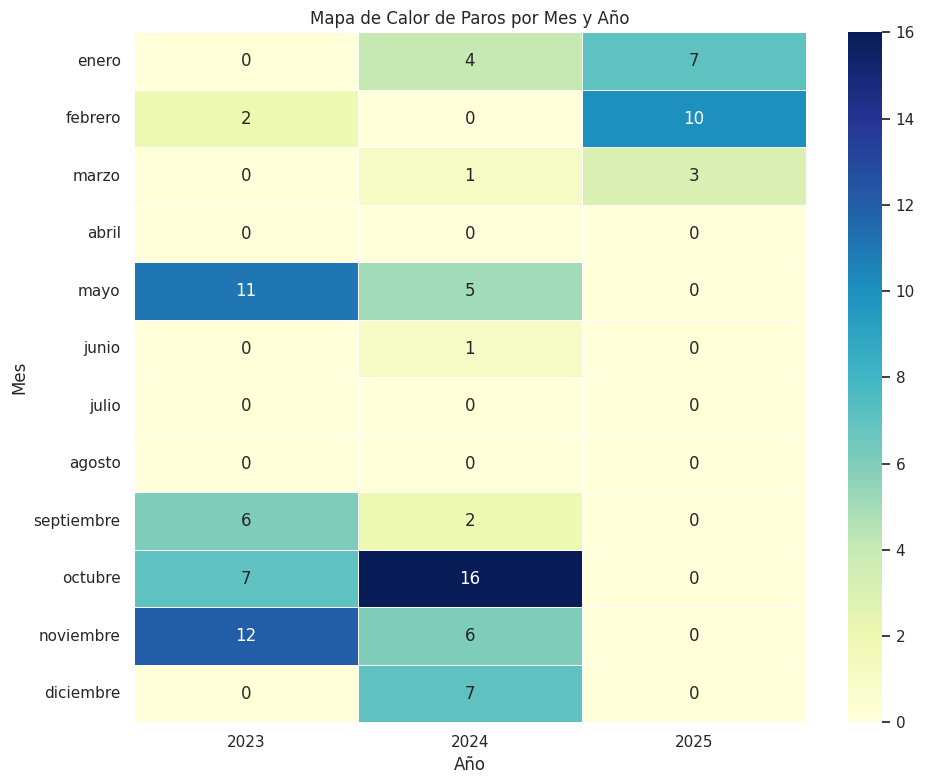

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivotar para obtener matriz año vs mes
pivot_table = df_heatmap_pd.pivot(index="mes", columns="año", values="count")

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5)

plt.title("Mapa de Calor de Paros por Mes y Año")
plt.xlabel("Año")
plt.ylabel("Mes")
plt.tight_layout()
plt.show()


In [ ]:
# Numero de paros por año por tipo de paro del 2022 al 2025
from pyspark.sql.functions import col

df_spark.filter(
    (col("no_1s") == "PARO") &
    (col("año") == 2023)
).groupBy("año", "tipo_paro") \
 .count() \
 .orderBy("tipo_paro") \
 .show(truncate=False)

df_spark.filter(
    (col("no_1s") == "PARO") &
    (col("año") == 2024)
).groupBy("año", "tipo_paro") \
 .count() \
 .orderBy("tipo_paro") \
 .show(truncate=False)

df_spark.filter(
    (col("no_1s") == "PARO") &
    (col("año") == 2025)
).groupBy("año", "tipo_paro") \
 .count() \
 .orderBy("tipo_paro") \
 .show(truncate=False)



+----+------------------------+-----+
|año |tipo_paro               |count|
+----+------------------------+-----+
|2023|ELECTRICO               |32   |
|2023|EXTERNO                 |22   |
|2023|MANTENIMIENTO PROGRAMADO|1    |
|2023|MECANICO                |64   |
|2023|OPERACION               |15   |
|2023|PROGRAMA DE PRODUCCION  |2    |
+----+------------------------+-----+

+----+------------------------+-----+
|año |tipo_paro               |count|
+----+------------------------+-----+
|2024|ELECTRICO               |19   |
|2024|EXTERNO                 |27   |
|2024|MANTENIMIENTO PROGRAMADO|2    |
|2024|MECANICO                |46   |
|2024|OPERACION               |17   |
|2024|PROGRAMA DE PRODUCCION  |3    |
+----+------------------------+-----+

+----+---------+-----+
|año |tipo_paro|count|
+----+---------+-----+
|2025|ELECTRICO|3    |
|2025|EXTERNO  |5    |
|2025|MECANICO |10   |
|2025|OPERACION|2    |
+----+---------+-----+



In [ ]:
#Exportar apandas para realizar graficos

from pyspark.sql.functions import col

paros_por_tipo_y_anio = df_spark.filter(
    (col("no_1s") == "PARO") &
    (col("año").between(2023, 2025))
).groupBy("año", "tipo_paro") \
 .count() \
 .orderBy("año", "tipo_paro")


In [ ]:
pdf = paros_por_tipo_y_anio.toPandas()


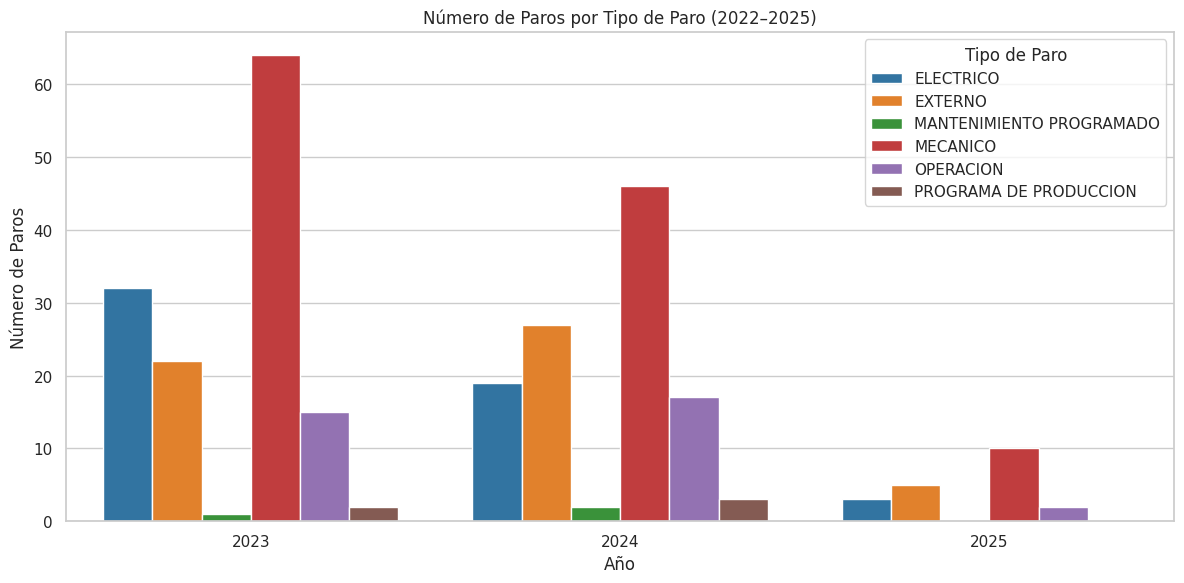

In [ ]:
#Graficar
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito con seaborn
sns.set(style="whitegrid")

# Crea una gráfica de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=pdf, x="año", y="count", hue="tipo_paro", palette="tab10")

# Títulos y etiquetas
plt.title("Número de Paros por Tipo de Paro (2022–2025)")
plt.xlabel("Año")
plt.ylabel("Número de Paros")
plt.legend(title="Tipo de Paro")
plt.xticks(rotation=0)

# Mostrar gráfica
plt.tight_layout()
plt.show()


In [ ]:

# Numero de paros por area2 del 2022 al 2025
from pyspark.sql.functions import col



df_spark.filter(
    (col("no_1s") == "PARO") &
    (col("año") == 2023)
).groupBy("año", "area2") \
 .count() \
 .orderBy("area2") \
 .show(truncate=False)

df_spark.filter(
    (col("no_1s") == "PARO") &
    (col("año") == 2024)
).groupBy("año", "area2") \
 .count() \
 .orderBy("area2") \
 .show(truncate=False)

df_spark.filter(
    (col("no_1s") == "PARO") &
    (col("año") == 2025)
).groupBy("año", "area2") \
 .count() \
 .orderBy("area2") \
 .show(truncate=False)



+----+-----------+-----+
|año |area2      |count|
+----+-----------+-----+
|2023|CARBON     |5    |
|2023|CEMENTO    |47   |
|2023|CRUDO      |23   |
|2023|HORNO      |51   |
|2023|TRITURADORA|10   |
+----+-----------+-----+

+----+-----------+-----+
|año |area2      |count|
+----+-----------+-----+
|2024|CARBON     |3    |
|2024|CEMENTO    |24   |
|2024|CRUDO      |30   |
|2024|HORNO      |51   |
|2024|TRITURADORA|6    |
+----+-----------+-----+

+----+-----------+-----+
|año |area2      |count|
+----+-----------+-----+
|2025|CEMENTO    |4    |
|2025|CRUDO      |5    |
|2025|HORNO      |9    |
|2025|TRITURADORA|2    |
+----+-----------+-----+



In [ ]:
from pyspark.sql.functions import col

# Agrupar por año y área2
paros_area_df = df_spark.filter(
    (col("no_1s") == "PARO") &
    (col("año").between(2023, 2025))
).groupBy("año", "area2") \
 .count() \
 .orderBy("año", "area2")

# Convertir a Pandas
paros_area_pdf = paros_area_df.toPandas()


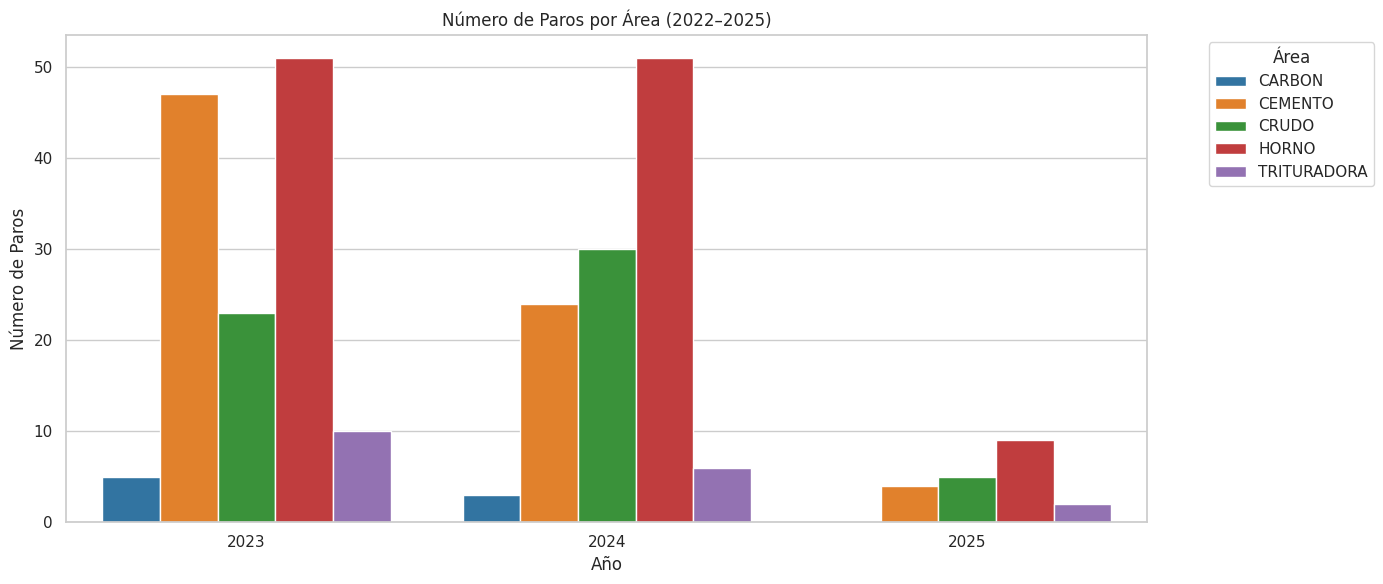

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráfico
sns.set(style="whitegrid")

# Tamaño de la figura
plt.figure(figsize=(14, 6))

# Gráfico de barras agrupadas
sns.barplot(data=paros_area_pdf, x="año", y="count", hue="area2", palette="tab10")

# Etiquetas y título
plt.title("Número de Paros por Área (2022–2025)")
plt.xlabel("Año")
plt.ylabel("Número de Paros")
plt.legend(title="Área", bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda afuera
plt.tight_layout()

# Mostrar
plt.show()


In [ ]:
# Numero de paros por proceso
from pyspark.sql.functions import col

df_spark.filter(
    (col("no_1s") == "PARO") &
    (col("año") == 2023)
).groupBy("proceso") \
 .count() \
 .orderBy("count", ascending=False) \
 .show(truncate=False)

df_spark.filter(
    (col("no_1s") == "PARO") &
    (col("año") == 2024)
).groupBy("proceso") \
 .count() \
 .orderBy("count", ascending=False) \
 .show(truncate=False)

df_spark.filter(
    (col("no_1s") == "PARO") &
    (col("año") == 2025)
).groupBy("proceso") \
 .count() \
 .orderBy("count", ascending=False) \
 .show(truncate=False)



+-------------+-----+
|proceso      |count|
+-------------+-----+
|HORNO        |51   |
|CEMENTO UG   |24   |
|CRUDO        |23   |
|CEMENTO ART  |22   |
|TRITURADORA  |10   |
|CARBON       |5    |
|CEMENTO FIBRO|1    |
+-------------+-----+

+-------------+-----+
|proceso      |count|
+-------------+-----+
|HORNO        |51   |
|CRUDO        |29   |
|CEMENTO UG   |16   |
|CEMENTO ART  |7    |
|TRITURADORA  |6    |
|CARBON       |4    |
|CEMENTO FIBRO|1    |
+-------------+-----+

+-----------+-----+
|proceso    |count|
+-----------+-----+
|HORNO      |9    |
|CRUDO      |5    |
|CEMENTO UG |4    |
|TRITURADORA|2    |
+-----------+-----+



In [ ]:
from pyspark.sql.functions import col

# Filtrar y agrupar por año y proceso
df_paros_proceso = df_spark.filter(
    (col("no_1s") == "PARO") &
    (col("año").isin(2023, 2024, 2025))
).groupBy("año", "proceso") \
 .count() \
 .orderBy("año", "count", ascending=False)

# Convertir a Pandas
df_paros_proceso_pd = df_paros_proceso.toPandas()


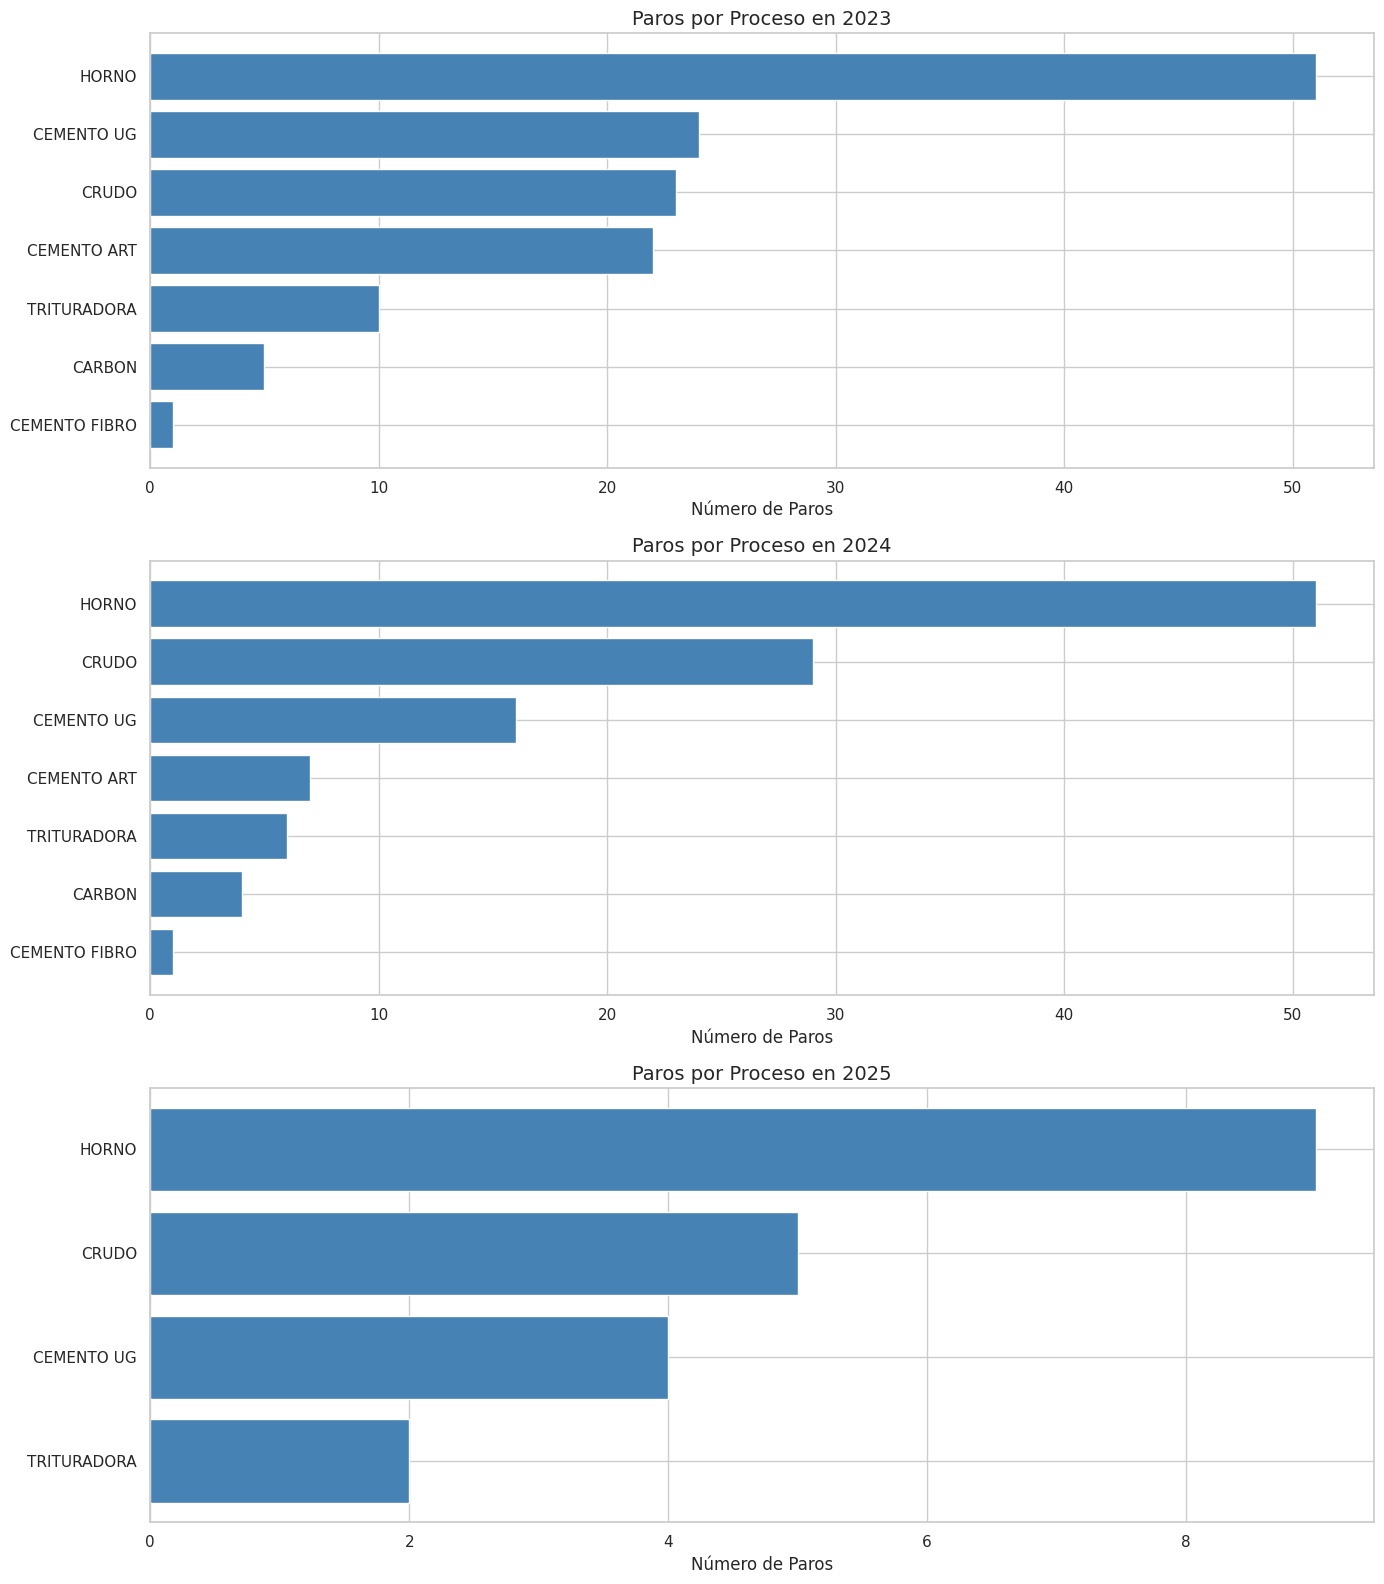

In [ ]:
import matplotlib.pyplot as plt

# Crear figura
fig, axes = plt.subplots(3, 1, figsize=(14, 16), sharex=False)

# Lista de años
años = [2023, 2024, 2025]

# Graficar cada año
for idx, año in enumerate(años):
    data = df_paros_proceso_pd[df_paros_proceso_pd["año"] == año]
    axes[idx].barh(data["proceso"], data["count"], color="steelblue")
    axes[idx].set_title(f"Paros por Proceso en {año}", fontsize=14)
    axes[idx].set_xlabel("Número de Paros")
    axes[idx].invert_yaxis()  # Proceso más alto arriba

plt.tight_layout()
plt.show()


In [ ]:
#Causas de paro mas frecuentes en area Horno
from pyspark.sql.functions import col

df_spark.filter(
    (col("año") == 2023) &
    (col("no_1s") == "PARO") &
    (col("proceso") == "HORNO")
).groupBy("causa_(digitar_en_mayusculas)") \
 .count() \
  \
 .orderBy("count", ascending=False) \
 .show(truncate=False)

df_spark.filter(
    (col("año") == 2024) &
    (col("no_1s") == "PARO") &
    (col("proceso") == "HORNO")
).groupBy("causa_(digitar_en_mayusculas)") \
 .count() \
  \
 .orderBy("count", ascending=False) \
 .show(truncate=False)

df_spark.filter(
    (col("año") == 2025) &
    (col("no_1s") == "PARO") &
    (col("proceso") == "HORNO")
).groupBy("causa_(digitar_en_mayusculas)") \
 .count() \
  \
 .orderBy("count", ascending=False) \
 .show(truncate=False)


+--------------------------------------------------------------------+-----+
|causa_(digitar_en_mayusculas)                                       |count|
+--------------------------------------------------------------------+-----+
|VARIACION DE TENSION ELECTRICA                                      |13   |
|CAIDA DE COSTRA                                                     |4    |
|BAJO NIVEL DEL SILO DE HARINA                                       |2    |
|DESALINEAMIENTO ELEVADOR 411EC02 POR LLUVIA                         |2    |
|PARA HORNO POR MANIOBRA CON TRANSFORMADOR EN LA 5P1                 |1    |
|ALARMA BOTA LLENA ELEVADOR ALIMENTACIÓN 411EC02                     |1    |
|CAE RAMA POR PODA EN LINEA AEREA 34,5                               |1    |
|AVALANCHA DE MATERIAL EN EL ENFRIADOR                               |1    |
|PARA HORNO PARA CAMBIO DE REFRACTARIO                               |1    |
|PARO DE HORNO ATASQUE CAJALAMINAS                                   |1    |

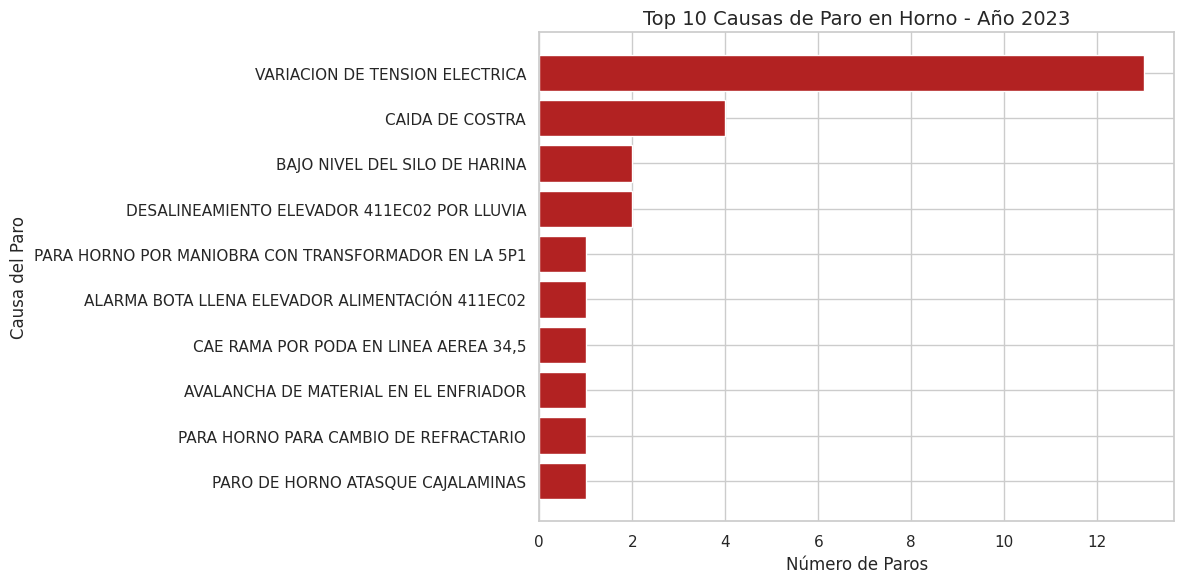

In [ ]:
import matplotlib.pyplot as plt

# Paso 1: Filtrar y agrupar los datos en PySpark
df_horno_2023 = df_spark.filter(
    (col("año") == 2023) &
    (col("no_1s") == "PARO") &
    (col("proceso") == "HORNO")
).groupBy("causa_(digitar_en_mayusculas)") \
 .count() \
 .orderBy("count", ascending=False)

# Paso 2: Convertir a Pandas
df_horno_2023_pd = df_horno_2023.toPandas()

# (Opcional) Limitar a las 10 principales causas
df_top10 = df_horno_2023_pd.head(10)

# Paso 3: Graficar
plt.figure(figsize=(12, 6))
plt.barh(df_top10["causa_(digitar_en_mayusculas)"], df_top10["count"], color="firebrick")
plt.xlabel("Número de Paros", fontsize=12)
plt.ylabel("Causa del Paro", fontsize=12)
plt.title("Top 10 Causas de Paro en Horno - Año 2023", fontsize=14)
plt.gca().invert_yaxis()  # Mostrar la causa con más paros arriba
plt.tight_layout()
plt.show()


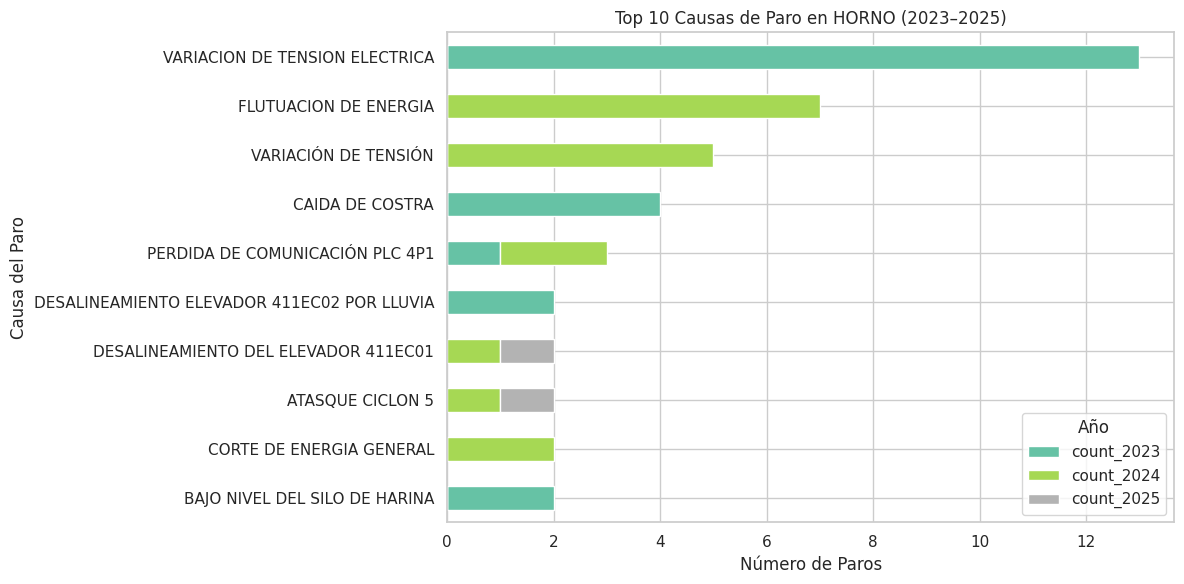

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener datos por año desde PySpark → Pandas
años = [2023, 2024, 2025]
df_list = []

for año in años:
    df_tmp = df_spark.filter(
        (col("año") == año) &
        (col("no_1s") == "PARO") &
        (col("proceso") == "HORNO")
    ).groupBy("causa_(digitar_en_mayusculas)") \
     .count() \
     .withColumnRenamed("count", f"count_{año}") \
     .toPandas()

    df_tmp.set_index("causa_(digitar_en_mayusculas)", inplace=True)
    df_list.append(df_tmp)

# Unir los 3 DataFrames por causa
df_combined = pd.concat(df_list, axis=1).fillna(0).astype(int)

# Filtrar las causas más frecuentes (ej. top 10 en total sumado)
df_combined["total"] = df_combined.sum(axis=1)
df_top = df_combined.sort_values("total", ascending=False).head(10).drop(columns="total")

# Graficar
df_top.plot(kind="barh", stacked=True, figsize=(12, 6), colormap="Set2")
plt.xlabel("Número de Paros")
plt.ylabel("Causa del Paro")
plt.title("Top 10 Causas de Paro en HORNO (2023–2025)")
plt.legend(title="Año")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
from pyspark.sql.functions import col

df_spark.filter(
    (col("año") == 2023) &
    (col("no_1s") == "PARO") &
    (col("proceso") == "HORNO")
).groupBy("tipo_paro") \
 .count() \
  \
 .orderBy("count", ascending=False) \
 .show(truncate=False)

df_spark.filter(
    (col("año") == 2024) &
    (col("no_1s") == "PARO") &
    (col("proceso") == "HORNO")
).groupBy("tipo_paro") \
 .count() \
  \
 .orderBy("count", ascending=False) \
 .show(truncate=False)

df_spark.filter(
    (col("año") == 2025) &
    (col("no_1s") == "PARO") &
    (col("proceso") == "HORNO")
).groupBy("tipo_paro") \
 .count() \
  \
 .orderBy("count", ascending=False) \
 .show(truncate=False)

+----------------------+-----+
|tipo_paro             |count|
+----------------------+-----+
|EXTERNO               |22   |
|OPERACION             |14   |
|ELECTRICO             |10   |
|MECANICO              |3    |
|PROGRAMA DE PRODUCCION|2    |
+----------------------+-----+

+----------------------+-----+
|tipo_paro             |count|
+----------------------+-----+
|EXTERNO               |20   |
|OPERACION             |15   |
|ELECTRICO             |11   |
|MECANICO              |3    |
|PROGRAMA DE PRODUCCION|2    |
+----------------------+-----+

+---------+-----+
|tipo_paro|count|
+---------+-----+
|MECANICO |3    |
|EXTERNO  |2    |
|ELECTRICO|2    |
|OPERACION|2    |
+---------+-----+



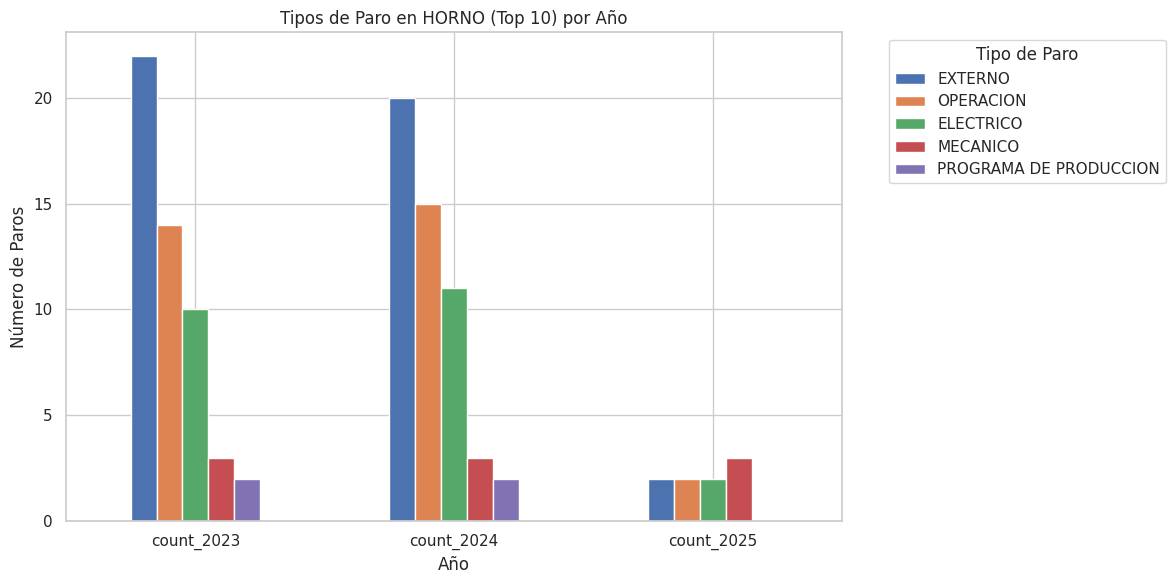

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de años
años = [2023, 2024, 2025]
dfs = []

# Recoger los datos desde Spark → Pandas para cada año
for año in años:
    df_tmp = df_spark.filter(
        (col("año") == año) &
        (col("no_1s") == "PARO") &
        (col("proceso") == "HORNO")
    ).groupBy("tipo_paro") \
     .count() \
     .withColumnRenamed("count", f"count_{año}") \
     .toPandas()

    df_tmp.set_index("tipo_paro", inplace=True)
    dfs.append(df_tmp)

# Unir los datos en un solo DataFrame
df_final = pd.concat(dfs, axis=1).fillna(0).astype(int)

# Para evitar ruido, selecciona los top 10 tipos de paro más frecuentes
df_final["total"] = df_final.sum(axis=1)
df_top = df_final.sort_values("total", ascending=False).head(10).drop(columns="total")

# Transponer para graficar barras agrupadas
df_top_T = df_top.T

# Graficar
df_top_T.plot(kind="bar", figsize=(12, 6))
plt.title("Tipos de Paro en HORNO (Top 10) por Año")
plt.xlabel("Año")
plt.ylabel("Número de Paros")
plt.xticks(rotation=0)
plt.legend(title="Tipo de Paro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Ver resultados
df_spark.show(5)

+-----+-------------------+-------------------+-------------------+-------------------+-----------------------------+-------+---------------+------------------------+---------+----------------+-------+--------+-------+--------------------+-------+-------+----+
|no_1s|              fecha|             inicio|              final|     tiempo_de_paro|causa_(digitar_en_mayusculas)|proceso|horas_total_(h)|codigo_ubicación_tecnica|tipo_paro|      imputación|   area|proceso2|  clase|          nombre_rca|  area2|    mes| año|
+-----+-------------------+-------------------+-------------------+-------------------+-----------------------------+-------+---------------+------------------------+---------+----------------+-------+--------+-------+--------------------+-------+-------+----+
| CONT|2022-01-31 00:00:00|2022-01-31 00:00:00|2022-01-31 03:34:00|2022-01-31 03:34:00|         BOTA LLENA DEL EL...|CEMENTO|           3.57|           EC01-581-EC01|OPERACION|  AERODESLIZADOR|PROCESO| PROCESO|PROCESO

In [ ]:
# Crear DF sola para definir Areas de paro
df_sparkH = df_spark.select(
    "no_1s",
    "tipo_paro",
    "proceso",
    "horas_total_(h)",
    "año"
)

df_sparkH.show(truncate=False)


+-----+------------------------+-----------+---------------+----+
|no_1s|tipo_paro               |proceso    |horas_total_(h)|año |
+-----+------------------------+-----------+---------------+----+
|CONT |OPERACION               |CEMENTO    |3.57           |2022|
|PARO |OPERACION               |CEMENTO    |1.95           |2022|
|PARO |OPERACION               |CARBON     |1.0            |2022|
|PARO |OPERACION               |CARBON     |1.58           |2022|
|PARO |OPERACION               |CARBON     |0.3            |2022|
|PARO |OPERACION               |HORNO      |0.73           |2022|
|PARO |PROGRAMA DE PRODUCCION  |CEMENTO    |3.52           |2022|
|PARO |EXTERNO                 |CARBON     |1.18           |2022|
|PARO |MINA                    |CARBON     |0.88           |2022|
|PARO |PROGRAMA DE PRODUCCION  |TRITURADORA|3.32           |2022|
|CONT |ELECTRICO               |CEMENTO    |0.1            |2022|
|CONT |EXTERNO                 |CRUDO      |5.57           |2022|
|CONT |PRO

In [ ]:
# Tabla de datos para realizar modelo ML de agrupamien to K-Means
from pyspark.sql.functions import col

df_sparkH = df_sparkH.filter(
    (col("no_1s") == "PARO") &

    (col("año") == 2023)
)

df_sparkH.show(truncate=False)


+-----+---------+-------------+---------------+----+
|no_1s|tipo_paro|proceso      |horas_total_(h)|año |
+-----+---------+-------------+---------------+----+
|PARO |ELECTRICO|HORNO        |2.67           |2023|
|PARO |OPERACION|HORNO        |0.08           |2023|
|PARO |MECANICO |CEMENTO FIBRO|12.13          |2023|
|PARO |ELECTRICO|CRUDO        |0.32           |2023|
|PARO |ELECTRICO|TRITURADORA  |5.97           |2023|
|PARO |MECANICO |CEMENTO UG   |1.45           |2023|
|PARO |ELECTRICO|CRUDO        |1.82           |2023|
|PARO |MECANICO |HORNO        |2.33           |2023|
|PARO |MECANICO |TRITURADORA  |15.98          |2023|
|PARO |ELECTRICO|CRUDO        |3.22           |2023|
|PARO |MECANICO |CEMENTO UG   |3.22           |2023|
|PARO |ELECTRICO|CRUDO        |5.47           |2023|
|PARO |EXTERNO  |HORNO        |0.23           |2023|
|PARO |MECANICO |CEMENTO UG   |0.3            |2023|
|PARO |MECANICO |CARBON       |1.8            |2023|
|PARO |OPERACION|HORNO        |0.13           

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# Indexar la columna tipo_paro
indexer = StringIndexer(inputCol="tipo_paro", outputCol="tipo_paro_index")

# Codificar en OneHot (vector binario)
encoder = OneHotEncoder(inputCol="tipo_paro_index", outputCol="tipo_paro_vec")


In [ ]:
from pyspark.ml.feature import VectorAssembler

# Definimos qué columnas usar como features
assembler = VectorAssembler(
    inputCols=["tipo_paro_vec", "horas_total_(h)"],
    outputCol="features"
)


In [ ]:
from pyspark.ml.clustering import KMeans

# Creamos el modelo con k clusters (puedes ajustar k)
kmeans = KMeans(featuresCol="features", k=3, seed=42)


In [ ]:
from pyspark.ml import Pipeline

# Construimos el pipeline con todas las etapas
pipeline = Pipeline(stages=[indexer, encoder, assembler, kmeans])

# Ajustamos el modelo al DataFrame limpio
model = pipeline.fit(df_sparkH)

# Obtenemos los resultados
predictions = model.transform(df_sparkH)

# Mostrar las predicciones
predictions.select(
    "tipo_paro",
    "horas_total_(h)",
    "prediction"
).show(truncate=False)


+---------+---------------+----------+
|tipo_paro|horas_total_(h)|prediction|
+---------+---------------+----------+
|ELECTRICO|2.67           |0         |
|OPERACION|0.08           |0         |
|MECANICO |12.13          |2         |
|ELECTRICO|0.32           |0         |
|ELECTRICO|5.97           |0         |
|MECANICO |1.45           |0         |
|ELECTRICO|1.82           |0         |
|MECANICO |2.33           |0         |
|MECANICO |15.98          |2         |
|ELECTRICO|3.22           |0         |
|MECANICO |3.22           |0         |
|ELECTRICO|5.47           |0         |
|EXTERNO  |0.23           |0         |
|MECANICO |0.3            |0         |
|MECANICO |1.8            |0         |
|OPERACION|0.13           |0         |
|EXTERNO  |0.08           |0         |
|EXTERNO  |0.48           |0         |
|MECANICO |10.25          |2         |
|MECANICO |23.5           |2         |
+---------+---------------+----------+
only showing top 20 rows



In [ ]:
# Análisis: promedio de horas por grupo
predictions.groupBy("prediction").avg("horas_total_(h)").show()

# Análisis: número de eventos por grupo
predictions.groupBy("prediction").count().show()


+----------+--------------------+
|prediction|avg(horas_total_(h))|
+----------+--------------------+
|         1|              193.28|
|         2|  13.731428571428575|
|         0|   2.206694214876033|
+----------+--------------------+

+----------+-----+
|prediction|count|
+----------+-----+
|         1|    1|
|         2|   14|
|         0|  121|
+----------+-----+



In [ ]:
# Ver Dataframe prediction para entender el resltado de la prediccion
predictions.printSchema()
predictions.show(truncate=False)



root
 |-- no_1s: string (nullable = true)
 |-- tipo_paro: string (nullable = true)
 |-- proceso: string (nullable = true)
 |-- horas_total_(h): double (nullable = true)
 |-- año: long (nullable = true)
 |-- tipo_paro_index: double (nullable = false)
 |-- tipo_paro_vec: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- prediction: integer (nullable = false)

+-----+---------+-------------+---------------+----+---------------+-------------+-----------+----------+
|no_1s|tipo_paro|proceso      |horas_total_(h)|año |tipo_paro_index|tipo_paro_vec|features   |prediction|
+-----+---------+-------------+---------------+----+---------------+-------------+-----------+----------+
|PARO |ELECTRICO|HORNO        |2.67           |2023|1.0            |(5,[1],[1.0])|[1.0,2.67] |0         |
|PARO |OPERACION|HORNO        |0.08           |2023|3.0            |(5,[3],[1.0])|[3.0,0.08] |0         |
|PARO |MECANICO |CEMENTO FIBRO|12.13          |2023|0.0            |(5,[0],[1.0])|[0.0,12.

In [ ]:
# Filtramos las filas donde la predicción sea distinta de 1
predictions_filtrado = predictions.filter(predictions["prediction"] != 1)

# Verificamos
predictions_filtrado.select("tipo_paro", "horas_total_(h)", "prediction").show()


+---------+---------------+----------+
|tipo_paro|horas_total_(h)|prediction|
+---------+---------------+----------+
|ELECTRICO|           2.67|         0|
|OPERACION|           0.08|         0|
| MECANICO|          12.13|         2|
|ELECTRICO|           0.32|         0|
|ELECTRICO|           5.97|         0|
| MECANICO|           1.45|         0|
|ELECTRICO|           1.82|         0|
| MECANICO|           2.33|         0|
| MECANICO|          15.98|         2|
|ELECTRICO|           3.22|         0|
| MECANICO|           3.22|         0|
|ELECTRICO|           5.47|         0|
|  EXTERNO|           0.23|         0|
| MECANICO|            0.3|         0|
| MECANICO|            1.8|         0|
|OPERACION|           0.13|         0|
|  EXTERNO|           0.08|         0|
|  EXTERNO|           0.48|         0|
| MECANICO|          10.25|         2|
| MECANICO|           23.5|         2|
+---------+---------------+----------+
only showing top 20 rows



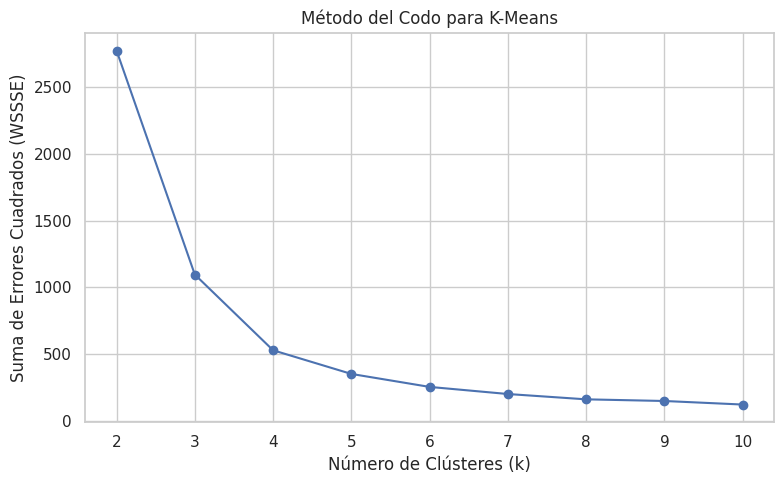

In [ ]:
import matplotlib.pyplot as plt
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

# Preparamos los datos de nuevo para aplicar el método del codo
indexer = StringIndexer(inputCol="tipo_paro", outputCol="tipo_paro_index")
assembler = VectorAssembler(inputCols=["tipo_paro_index", "horas_total_(h)"], outputCol="features")

# Probar diferentes valores de k
cost = []
ks = list(range(2, 11))

for k in ks:
    kmeans = KMeans(k=k, seed=1, featuresCol="features")
    pipeline = Pipeline(stages=[indexer, assembler, kmeans])
    model = pipeline.fit(df_sparkH)
    wssse = model.stages[-1].summary.trainingCost  # Última etapa es KMeans
    cost.append(wssse)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(ks, cost, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Suma de Errores Cuadrados (WSSSE)')
plt.grid(True)
plt.tight_layout()
plt.show()


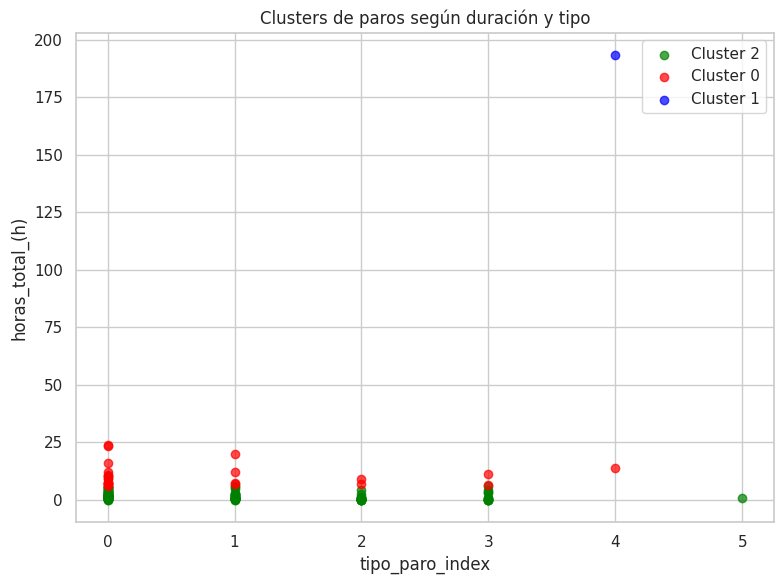

In [ ]:
# Grafica con los 3 cluster definidos - Cluster 1 es paro programado por ende Dato atipico
import matplotlib.pyplot as plt

# Aplicamos el modelo entrenado con k=3
indexer = StringIndexer(inputCol="tipo_paro", outputCol="tipo_paro_index")
assembler = VectorAssembler(inputCols=["tipo_paro_index", "horas_total_(h)"], outputCol="features")
kmeans = KMeans(k=3, seed=1, featuresCol="features")

from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[indexer, assembler, kmeans])
model = pipeline.fit(df_sparkH)

# Transformar el DataFrame con las predicciones
df_clustered = model.transform(df_sparkH)

# Seleccionar columnas útiles y convertir a Pandas
df_plot = df_clustered.select("tipo_paro_index", "horas_total_(h)", "prediction").toPandas()

# Graficar usando matplotlib
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']

for cluster in df_plot['prediction'].unique():
    cluster_data = df_plot[df_plot['prediction'] == cluster]
    plt.scatter(cluster_data["tipo_paro_index"], cluster_data["horas_total_(h)"],
                label=f"Cluster {cluster}", alpha=0.7, color=colors[cluster])

plt.xlabel("tipo_paro_index")
plt.ylabel("horas_total_(h)")
plt.title("Clusters de paros según duración y tipo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


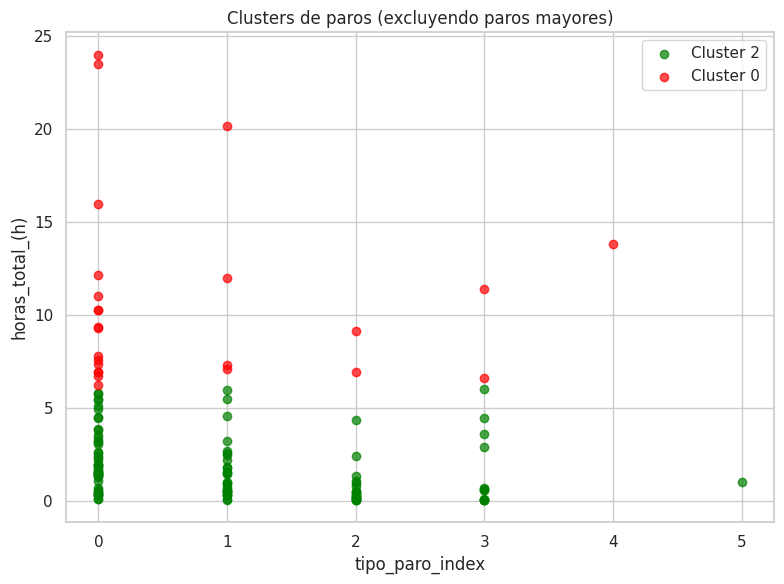

In [ ]:
# Se elimina el dato atipico para no alterar la Visualización
import matplotlib.pyplot as plt
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline

# Pipeline para clustering
indexer = StringIndexer(inputCol="tipo_paro", outputCol="tipo_paro_index")
assembler = VectorAssembler(inputCols=["tipo_paro_index", "horas_total_(h)"], outputCol="features")
kmeans = KMeans(k=3, seed=1, featuresCol="features")
pipeline = Pipeline(stages=[indexer, assembler, kmeans])

# Entrenar modelo
model = pipeline.fit(df_sparkH)

# Transformar datos
df_clustered = model.transform(df_sparkH)

# Convertir a Pandas
df_plot = df_clustered.select("tipo_paro_index", "horas_total_(h)", "prediction").toPandas()

# ✅ Filtrar el clúster 1
df_plot = df_plot[df_plot["prediction"] != 1]

# Graficar
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']

for cluster in df_plot['prediction'].unique():
    cluster_data = df_plot[df_plot['prediction'] == cluster]
    plt.scatter(cluster_data["tipo_paro_index"], cluster_data["horas_total_(h)"],
                label=f"Cluster {cluster}", alpha=0.7, color=colors[cluster])

plt.xlabel("tipo_paro_index")
plt.ylabel("horas_total_(h)")
plt.title("Clusters de paros (excluyendo paros mayores)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

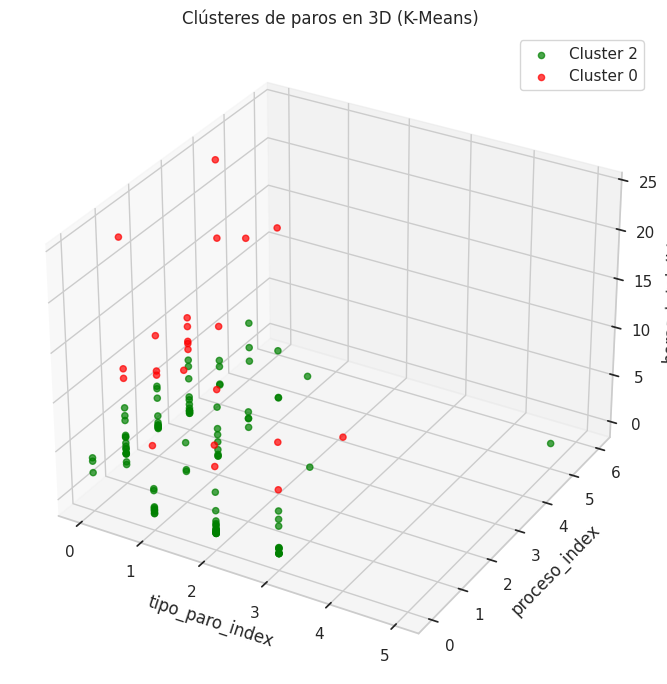

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # para 3D

# Indexar columnas categóricas
tipo_paro_indexer = StringIndexer(inputCol="tipo_paro", outputCol="tipo_paro_index")
proceso_indexer = StringIndexer(inputCol="proceso", outputCol="proceso_index")

# VectorAssembler con 3 columnas
assembler = VectorAssembler(
    inputCols=["tipo_paro_index", "proceso_index", "horas_total_(h)"],
    outputCol="features"
)

# KMeans con 3 clústeres
kmeans = KMeans(k=3, seed=1, featuresCol="features")

# Pipeline completo
pipeline = Pipeline(stages=[tipo_paro_indexer, proceso_indexer, assembler, kmeans])
model = pipeline.fit(df_sparkH)
df_clustered = model.transform(df_sparkH)


# Convertir a Pandas para graficar
df_plot = df_clustered.select("tipo_paro_index", "proceso_index", "horas_total_(h)", "prediction").toPandas()


# ✅ Filtrar el clúster 1
df_plot = df_plot[df_plot["prediction"] != 1]


# Gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green']
for cluster in df_plot['prediction'].unique():
    subset = df_plot[df_plot['prediction'] == cluster]
    ax.scatter(
        subset["tipo_paro_index"],
        subset["proceso_index"],
        subset["horas_total_(h)"],
        label=f"Cluster {cluster}",
        alpha=0.7,
        color=colors[cluster]
    )

ax.set_xlabel("tipo_paro_index")
ax.set_ylabel("proceso_index")
ax.set_zlabel("horas_total_(h)")
ax.set_title("Clústeres de paros en 3D (K-Means)")
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Obtener los indexadores desde el modelo entrenado
tipo_paro_model = model.stages[0]
proceso_model = model.stages[1]

# Mostrar el mapeo de tipo_paro
print("=== Mapeo tipo_paro_index ===")
for i, label in enumerate(tipo_paro_model.labels):
    print(f"{i}: {label}")

# Mostrar el mapeo de proceso
print("\n=== Mapeo proceso_index ===")
for i, label in enumerate(proceso_model.labels):
    print(f"{i}: {label}")


=== Mapeo tipo_paro_index ===
0: MECANICO
1: ELECTRICO
2: EXTERNO
3: OPERACION
4: PROGRAMA DE PRODUCCION
5: MANTENIMIENTO PROGRAMADO

=== Mapeo proceso_index ===
0: HORNO
1: CEMENTO UG
2: CRUDO
3: CEMENTO ART
4: TRITURADORA
5: CARBON
6: CEMENTO FIBRO


In [ ]:
# Selecciona las columnas deseadas
df_export = predictions_filtrado.select("tipo_paro", "horas_total_(h)", "prediction")

# Ruta de exportación (en Colab se usa /content/)
export_path = "/content/predictions_filtrado_csv"

# Escribe el archivo CSV (en un solo archivo con encabezados)
df_export.coalesce(1).write.mode("overwrite").option("header", "true").csv(export_path)


In [ ]:
import glob
import shutil

# Encontrar el archivo generado
csv_file = glob.glob(export_path + "/part-*.csv")[0]

# Moverlo a una ruta con nombre legible
final_path = "/content/predictions_filtrado.csv"
shutil.move(csv_file, final_path)


'/content/predictions_filtrado.csv'

In [ ]:
from google.colab import files

# Descargar el archivo CSV final
files.download(final_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>